Implementing a basic DE solver for the neutrino winds in terms of psi

Runge-Kutta method from Wikipedia:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/25f03454fd25957cc63be11ec534efdce349c52f">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/95bdbb2e3aa83735085c0aadd577162c69e4056a">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/81398071e8f180ac143bfdf4598ff47bf79eb689">
I use $\psi$ in place of t, and {r,v} as y. I calculate separate k values for r and v to get y'={r',v'}

Questions/next steps:

Is this correct? The behavior of this only depends on $r_0,v_0,G,M,$ and $c_s$

What are typical values for these?

In [58]:
import numpy as np
import matplotlib.pyplot as plt

cs=1
M=1
G=1
mB=1
dPdS=1
Se=0
rho=1
T=1
r0=1

def df1(r,v):
    return 1-(v/cs)**2

def df2(r,v):
    return G*M/(r*cs**2) - 2 + (r/v)*dPdS*mB*Se/((rho**2)*(cs**2)*T)

def ndf1(psi,coords):
    return 1-2*np.exp(2*coords[1])

def ndf2(psi,coords):
    return np.exp(-coords[0])*G*M/((cs**2)*r0)-2

def drdpsi(psi,coords):
    return coords[0]*f1(coords[0],coords[1])

def dvdpsi(psi,coords):
    return coords[1]*f2(coords[0],coords[1])

def CoupledRungeKuttaStep(af1,af2,fn,t,dt): #takes state f(n) and steps to f(n+dt) using arbitrary input functions f1 and f2
    f1k1=dt*af1(t,fn)
    f2k1=dt*af2(t,fn)
    f1k2=dt*af1(t+dt/2,fn+np.array([f1k1/2,f2k1/2]))
    f2k2=dt*af2(t+dt/2,fn+np.array([f1k1/2,f2k1/2]))
    f1k3=dt*af1(t+dt/2,fn+np.array([f1k2/2,f2k2/2]))
    f2k3=dt*af2(t+dt/2,fn+np.array([f1k2/2,f2k2/2]))
    f1k4=dt*af1(t+dt,fn+np.array([f1k3,f2k3]))
    f2k4=dt*af2(t+dt,fn+np.array([f1k3,f2k3]))
    return np.array([t+dt,np.array([fn[0]+(f1k1+2*f1k2+2*f1k3+f1k4)/6,fn[1]+(f2k1+2*f2k2+2*f2k3+f2k4)/6])])

def generateFunc(x0,u0,itermax):
    xsol=np.array([x0])
    usol=np.array([u0])
    t=0
    dt=.01
    ddt=2
    i=0
    prevstate=0
    currState=np.array([xsol[-1],usol[-1]])
    while i<itermax and abs(ndf1(t,currState))>.001:
        #print(ndf1(t,currState))
        currState=np.array([xsol[-1],usol[-1]])
        step=CoupledRungeKuttaStep(ndf1,ndf2,currState,t,dt)
        #print(step)
        percentChange=100*abs(np.linalg.norm((step[1]-currState)/np.linalg.norm(currState)))
        
        #print(percentChange,dt)
        if percentChange>1:
            if prevstate==2:
                ddt=ddt/2
                dt=dt/ddt
                print("ddt too big")
            else:
                dt=dt/ddt
                print("dt too big")
                prevstate=1
        elif percentChange<.1:
            if prevstate==1:
                ddt=ddt*2
                dt=ddt*dt
                print("ddt too small")
            else:
                dt=ddt*dt
                print("dt too small")
                prevstate=2
        else:
            xsol=np.append(xsol,step[1][0])
            usol=np.append(usol,step[1][1])
            #print("took step")
            prevstate=3
            i=i+1
            t=t+dt
    return np.array((xsol,usol))

dt too big
dt too big
dt too big
dt too big
dt too big
dt too big
dt too big
dt too big
dt too small
dt too small
dt too small
dt too small


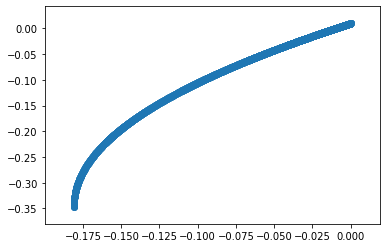

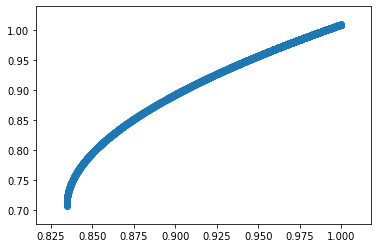

In [59]:
func=generateFunc(0,.01,10000)
plt.figure(1)
plt.scatter(func[0],func[1])
plt.figure(2)
plt.scatter(r0*np.exp(func[0]),cs*np.exp(func[1]));

In [ ]:
plt.plot(func[1])
#print(func[1])

In [ ]:
#Testing the CoupledRungeKuttaStep function with a known DE
#It works as expected

def testf(t,x):
    return -3*x[0]+np.sqrt(2)*x[1]
def testf2(t,x):
    return np.sqrt(2)*x[0]-2*x[1]

def generateTestFunc(x0,y0):
    x1=np.array([x0])
    x2=np.array([y0])
    t=0
    while t<10:
        step=CoupledRungeKuttaStep(testf,testf2,np.array([x1[-1],x2[-1]]),t,.01)
        x1=np.append(x1,step[1][0])
        x2=np.append(x2,step[1][1])
        t=t+.01
        #print(xstep)
    return np.array([x1,x2])

func2=generateTestFunc(2,-1)
plt.scatter(func2[0],func2[1])

In [1]:
!python3  -m pip install --user --upgrade cookiecutter

'python3' is not recognized as an internal or external command,
operable program or batch file.
